<hr style="border:10px solid #050A30"> </hr>
<h1>Online Retails</h1>
<p>This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
</p>

<hr style="border:10px solid #050A30"> </hr>
<h1>Importing Packages<h1>

In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np #opensource library for scientific computing
from scipy import stats

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


<hr style="border:10px solid #050A30"> </hr>
<h1>Reading and Creating Dataframes<h1>

In [2]:
#creating dataframes
train_data = pd.read_excel('Data/Online Retail.xlsx')

In [3]:
train_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

<hr style="border:10px solid #050A30"> </hr>
<h1>Identifying Dataframes<h1>

In [4]:
train_data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [5]:
train_data.shape

(541909, 8)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<h6>InvoiceNo</h6>
<p>Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.</p>

<h6>StockCode</h6>
<p>Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.</p>

<h6>Description</h6>
<p>Product (item) name. Nominal.</p>

<h6>Quantity</h6>
<p> The quantities of each product (item) per transaction. Numeric.</p>

<h6>Invoice Date</h6>
<p>Invice Date and time. Numeric, the day and time when each transaction was generated.</p>

<h6>Unit Price</h6>
<p>Unit price. Numeric, Product price per unit in sterling.</p>

<h6>Customer ID</h6>
<p>Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.</p>

<h6>Country</h6>
<p> Country name. Nominal, the name of the country where each customer resides.</p>

In [7]:
train_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

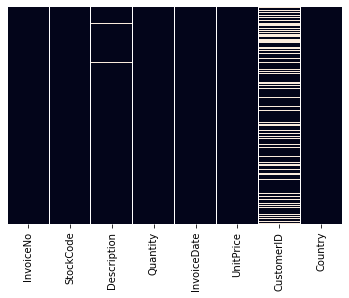

In [8]:
#generating heatmap for missing values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [9]:
#finding number of null values as a percentage 
df_null = round(100*(train_data.isnull().sum())/len(train_data), 2)

In [10]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

<p>Data points from Description Column and CustomerID column get missed.  Those values are unpredictable. Threfore the best solution is delete these columns</p>

<hr style="border:10px solid #050A30"> </hr>
<h1>Data Cleaning</h1>

In [11]:
#deleting rows with missing values 
train_data = train_data.dropna()

In [12]:
train_data.shape

(406829, 8)

In [13]:
train_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [14]:
#checking for null percentages in columns
td_null_perc = round(100*(train_data.isnull().sum())/len(train_data), 2)
td_null_perc

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [15]:
#convert the format of the InvoiceDate
train_data['InvoiceDate'] = pd.to_datetime(train_data['InvoiceDate'],format='%d-%m-%Y %H:%M')
train_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

<hr style="border:10px solid #050A30"> </hr>
<h1>Perparing RFM Values</h1>

<h6>What Is Recency, Frequency, Monetary Value (RFM)?</h6>
<p>Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:</p>
<ol>
    <li>Recency: How recently a customer has made a purchase</li>
    <li>Frequency: How often a customer makes a purchase</li>
    <li>Monetary Value: How much money a customer spends on purchases</li>
</ol>

In [16]:
for customer in train_data['CustomerID']:
    customer_str = str(int(customer))
    if len(customer_str) != 5:
        print(customer_str)

In [17]:
train_data['CustomerID'] = train_data['CustomerID'].astype(str)

In [18]:
train_data['CustomerID'].dtype

dtype('O')

In [19]:
#finding monetary value

train_data['Amount'] = train_data['UnitPrice']*train_data['Quantity']
td_monetary = train_data.groupby('CustomerID').sum()['Amount'].to_frame()
td_monetary = td_monetary.reset_index()
td_monetary.head()

CustomerID   Amount
0    12346.0     0.00
1    12347.0  4310.00
2    12348.0  1797.24
3    12349.0  1757.55
4    12350.0   334.40

In [20]:
#finding frequency

td_frequency = train_data.groupby('CustomerID')['InvoiceNo'].count()
td_frequency = td_frequency.reset_index()
td_frequency.columns = ['CustomerID','Frequency']
td_frequency.head()

CustomerID  Frequency
0    12346.0          2
1    12347.0        182
2    12348.0         31
3    12349.0         73
4    12350.0         17

In [21]:
#finding the recency

max_date = max(train_data['InvoiceDate'])
max_date
train_data['DateDifference'] = max_date - train_data['InvoiceDate']
td_recency = train_data.groupby('CustomerID')['DateDifference'].min()
td_recency = td_recency.reset_index()
td_recency['DateDifference'] =td_recency['DateDifference'].dt.days
td_recency.head()

CustomerID  DateDifference
0    12346.0             325
1    12347.0               1
2    12348.0              74
3    12349.0              18
4    12350.0             309

In [22]:
#combining monetary value, frequency and recency values together
#pd.merge(td_recency,td_frequency,td_monetary, on ='CustomerID', how = 'inner')
td_rfm = td_monetary.merge(td_frequency, how='inner', on='CustomerID')
td_rfm = td_rfm.merge(td_recency, how='inner', on='CustomerID')
td_rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
td_rfm.head()

CustomerID   Amount  Frequency  Recency
0    12346.0     0.00          2      325
1    12347.0  4310.00        182        1
2    12348.0  1797.24         31       74
3    12349.0  1757.55         73       18
4    12350.0   334.40         17      309

<AxesSubplot:title={'center':'Monetary'}, xlabel='CustomerID', ylabel='Amount'>

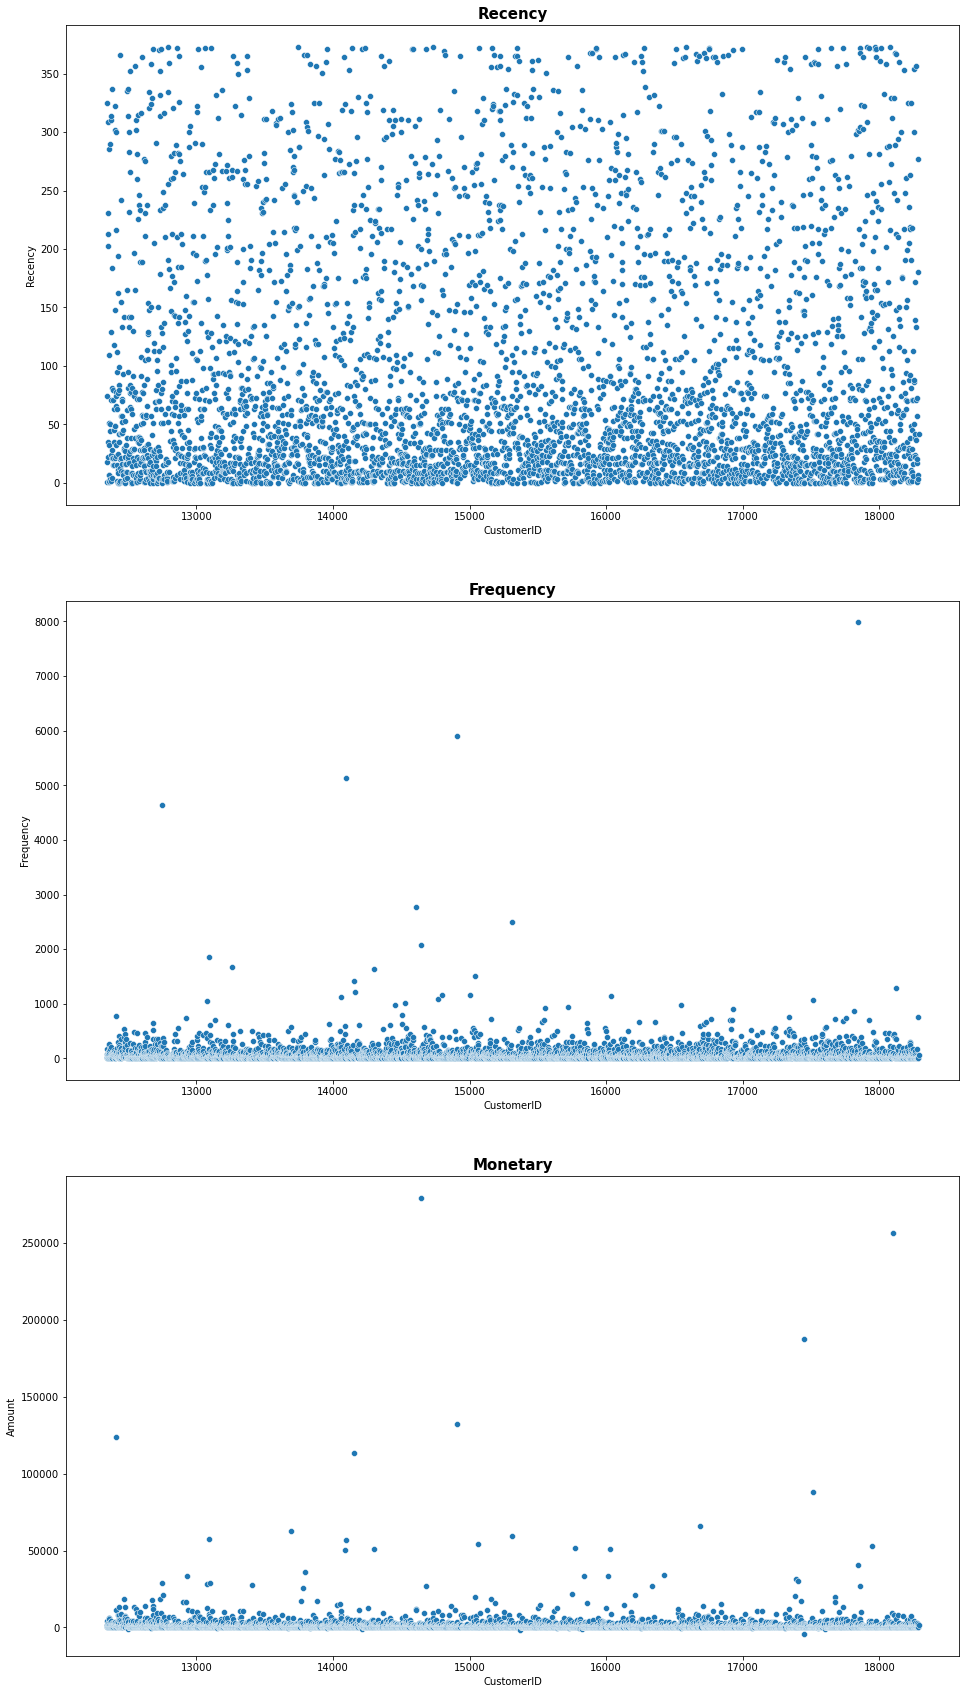

In [23]:
#creating new dataframe with numeric value for CustomerID column
rfm_scatter =  td_rfm[['CustomerID', 'Amount', 'Frequency', 'Recency']]
rfm_scatter['CustomerID'] = rfm_scatter['CustomerID'].astype(float)

#plotting scatter plots for recency, frequency and monetary.
fig, ax = plt.subplots(3,1,figsize=(16, 30))

ax[0].set_title('Recency', fontsize=15, fontweight='bold')
ax[1].set_title('Frequency', fontsize=15, fontweight='bold')
ax[2].set_title('Monetary', fontsize=15, fontweight='bold')

sns.scatterplot(data=rfm_scatter, x="CustomerID", y="Recency",ax=ax[0])
sns.scatterplot(data=rfm_scatter, x="CustomerID", y="Frequency",ax=ax[1])
sns.scatterplot(data=rfm_scatter, x="CustomerID", y="Amount",ax=ax[2])



<p>Clusters are difficult to detect easily due to the outliers. Consequently, outliers should detect and remove.</p>

<hr style="border:10px solid #050A30"> </hr>
<h1>Detecting and Removing Outliers</h1>

<p>Let's seek for outliers with box plots</p>

<AxesSubplot:title={'center':'Outliers in Variable Distribution'}, xlabel='Attributes', ylabel='Range'>

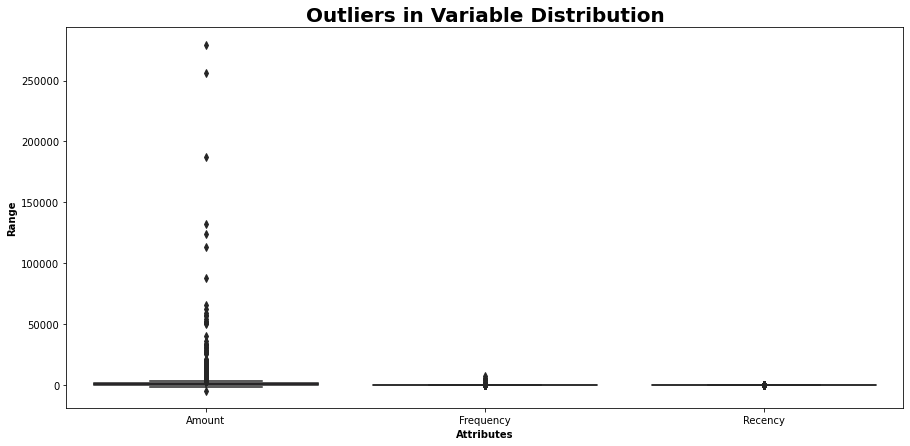

In [24]:
#plotting boxplots for three distributions 
attributes = ['Amount', 'Frequency', 'Recency']

fig, ax = plt.subplots(figsize=(15, 7))

ax.set_title('Outliers in Variable Distribution',fontweight='bold',fontsize=20)
ax.set_xlabel('Attributes',fontweight='bold')
ax.set_ylabel('Range',fontweight='bold')

sns.boxplot(data=td_rfm[attributes],palette='rocket')


<p>It is clear that there are many outliers in all three columns. Concequently, those outliers may remove.</p>

In [30]:
# Removing (statistical) outliers for Amount
Q1 = td_rfm.Amount.quantile(0.05)
Q3 = td_rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
td_rfm = td_rfm[(td_rfm.Amount >= Q1 - 1.5*IQR) & (td_rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = td_rfm.Recency.quantile(0.05)
Q3 = td_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
td_rfm = td_rfm[(td_rfm.Recency >= Q1 - 1.5*IQR) & (td_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = td_rfm.Frequency.quantile(0.05)
Q3 = td_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
td_rfm = td_rfm[(td_rfm.Frequency >= Q1 - 1.5*IQR) & (td_rfm.Frequency <= Q3 + 1.5*IQR)]

In [32]:
td_rfm.head()

CustomerID   Amount  Frequency  Recency
0    12346.0     0.00          2      325
1    12347.0  4310.00        182        1
2    12348.0  1797.24         31       74
3    12349.0  1757.55         73       18
4    12350.0   334.40         17      309

<p>Now, let's vizualize outlire removed dataframe with scatterplots</p>

<AxesSubplot:title={'center':'Monetary'}, xlabel='CustomerID', ylabel='Amount'>

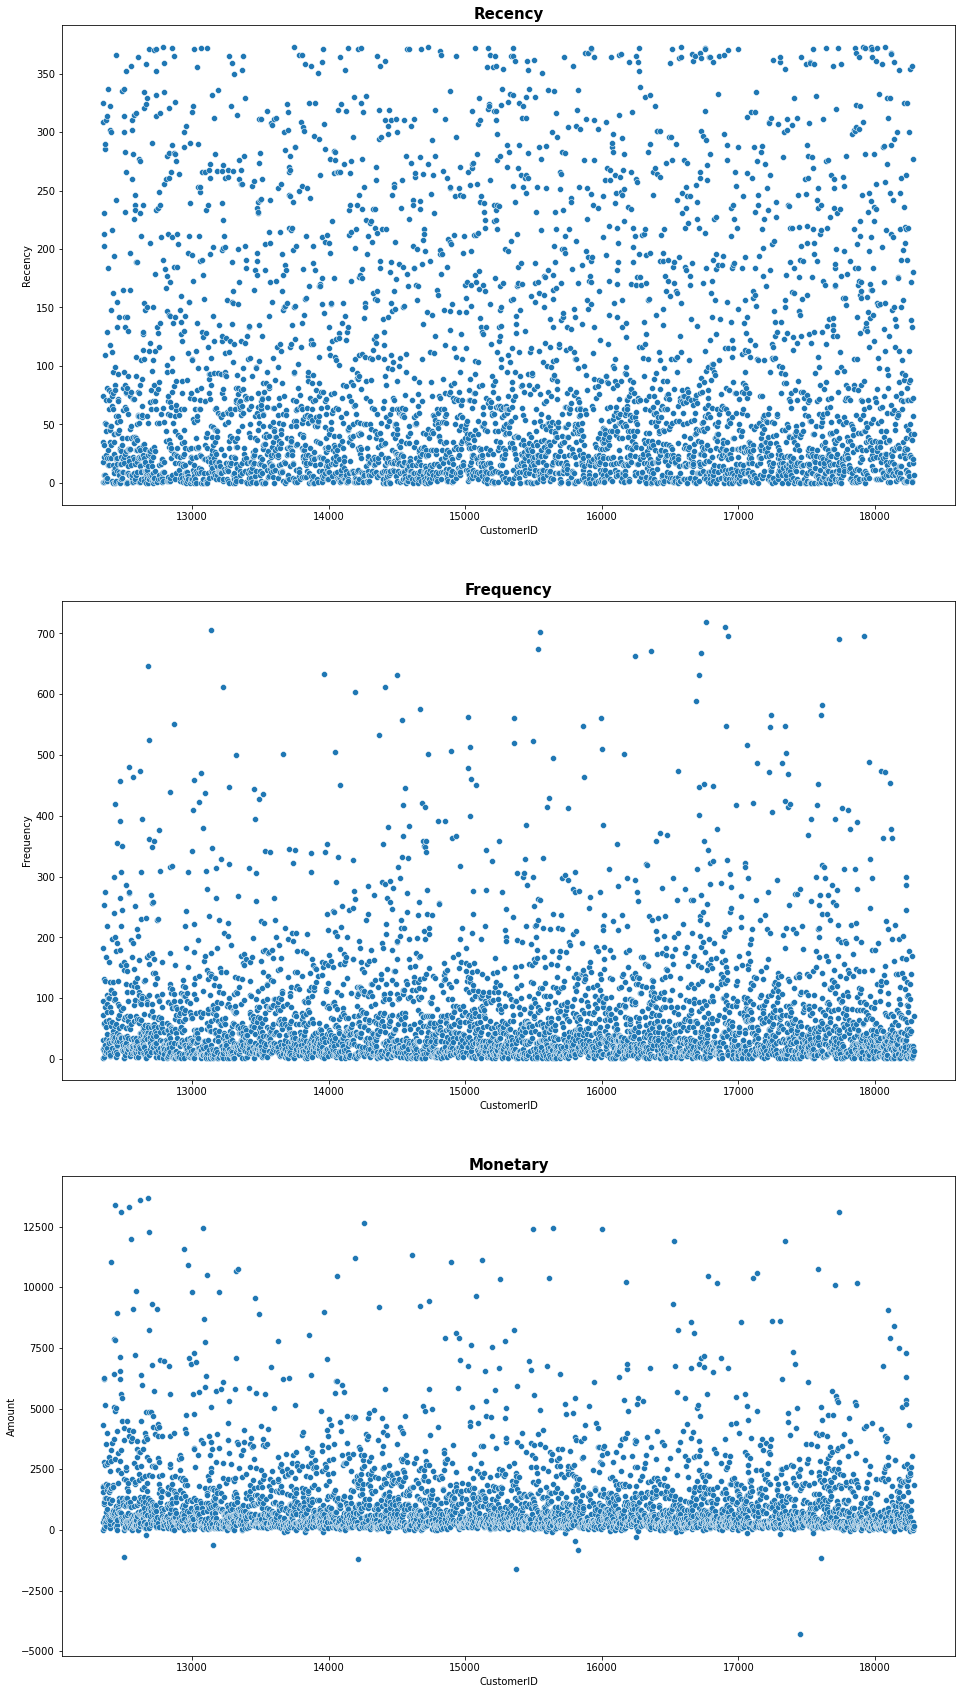

In [34]:
#creating new dataframe with numeric value for CustomerID column
rfm_out_scatter = td_rfm[['CustomerID', 'Amount', 'Frequency', 'Recency']]
rfm_out_scatter['CustomerID'] = td_rfm['CustomerID'].astype(float)


#plotting scatter plots for recency, frequency and monetary features in new dataframe.
fig, ax = plt.subplots(3,1,figsize=(16, 30))

ax[0].set_title('Recency', fontsize=15, fontweight='bold')
ax[1].set_title('Frequency', fontsize=15, fontweight='bold')
ax[2].set_title('Monetary', fontsize=15, fontweight='bold')


sns.scatterplot(data=rfm_out_scatter, x="CustomerID", y="Recency",ax=ax[0])
sns.scatterplot(data=rfm_out_scatter, x="CustomerID", y="Frequency",ax=ax[1])
sns.scatterplot(data=rfm_out_scatter, x="CustomerID", y="Amount",ax=ax[2])

<AxesSubplot:title={'center':'Variable Distribution after removing Outliers'}, xlabel='Attributes', ylabel='Range'>

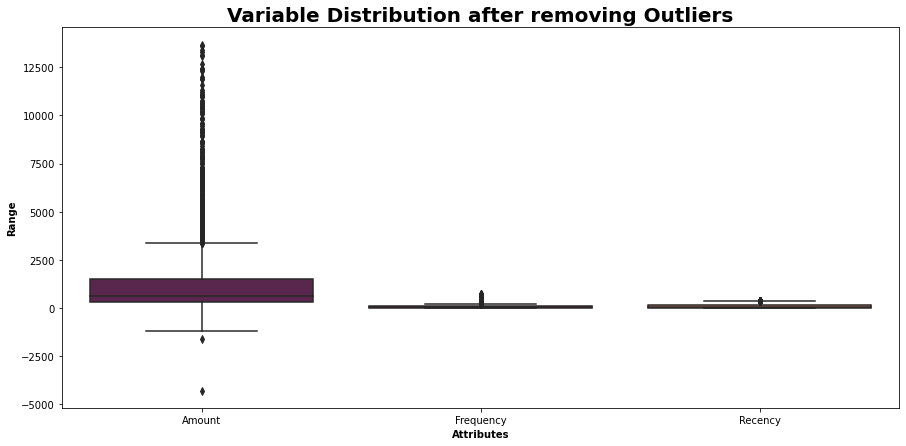

In [36]:
#plotting boxplots for three distributions 
attributes = ['Amount', 'Frequency', 'Recency']

fig, ax = plt.subplots(figsize=(15, 7))

ax.set_title('Variable Distribution after removing Outliers',fontweight='bold',fontsize=20)
ax.set_xlabel('Attributes',fontweight='bold')
ax.set_ylabel('Range',fontweight='bold')

sns.boxplot(data=td_rfm[attributes],palette='rocket')


<p>Now, it seems the outlier problem is fixed</p>

<hr style="border:10px solid #050A30"> </hr>
<h1>Scaling of data</h1>

In [38]:
#creating new dataframe to feed the standard scalar model
rfm_scale_in = td_rfm[['Amount', 'Frequency', 'Recency']]

#creating scalar object
scaler = StandardScaler()
rfm_scaled = pd.DataFrame(scaler.fit_transform(rfm_scale_in))
rfm_scaled.columns = ['Amount', 'Frequency', 'Recency'] 
rfm_scaled.head()

Amount  Frequency   Recency
0 -0.723738  -0.752888  2.301611
1  1.731617   1.042467 -0.906466
2  0.300128  -0.463636 -0.183658
3  0.277517  -0.044720 -0.738141
4 -0.533235  -0.603275  2.143188

In [40]:
#creating final rfm dataframe
rfm = pd.concat([td_rfm['CustomerID'],rfm_scaled],axis=1)
rfm.head()

CustomerID    Amount  Frequency   Recency
0    12346.0 -0.723738  -0.752888  2.301611
1    12347.0  1.731617   1.042467 -0.906466
2    12348.0  0.300128  -0.463636 -0.183658
3    12349.0  0.277517  -0.044720 -0.738141
4    12350.0 -0.533235  -0.603275  2.143188

<hr style="border:10px solid #050A30"> </hr>
<h1>Building the Model</h1>

In [41]:
#Creating Kmean model with 4 clusters and iteration size with 50

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

#kmeans.labels_

KMeans(max_iter=50, n_clusters=4)

<hr style="border:10px solid #050A30"> </hr>
<h1>Finding most suitable number of Clusters</h1>

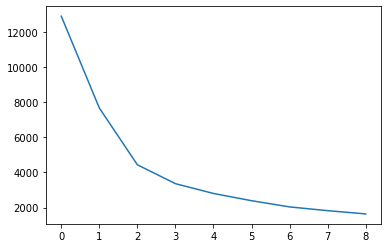

In [42]:
#find most suitable number of clusters using Elbow method
inertias = []
range_n_clusters = range(1,10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    inertias.append(kmeans.inertia_)

plt.plot(inertias)

For n_clusters = 2 The average silhouette_score is : 0.5415858652525395
For n_clusters = 3 The average silhouette_score is : 0.5084896296141937
For n_clusters = 4 The average silhouette_score is : 0.4776896767524438
For n_clusters = 5 The average silhouette_score is : 0.4662700564189704
For n_clusters = 6 The average silhouette_score is : 0.4177770208689698


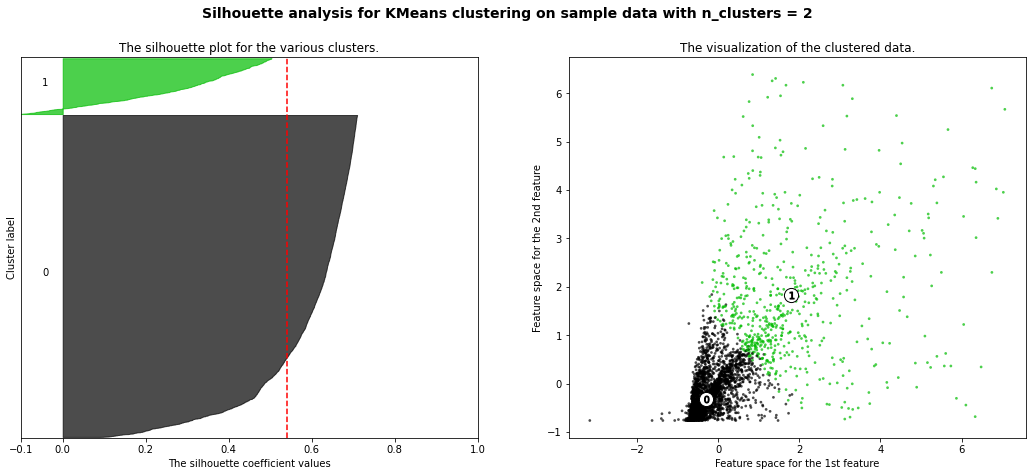

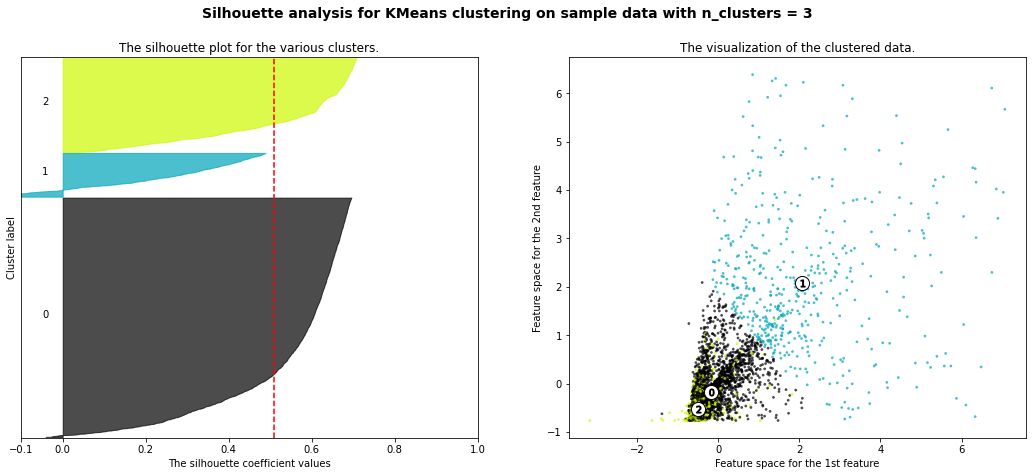

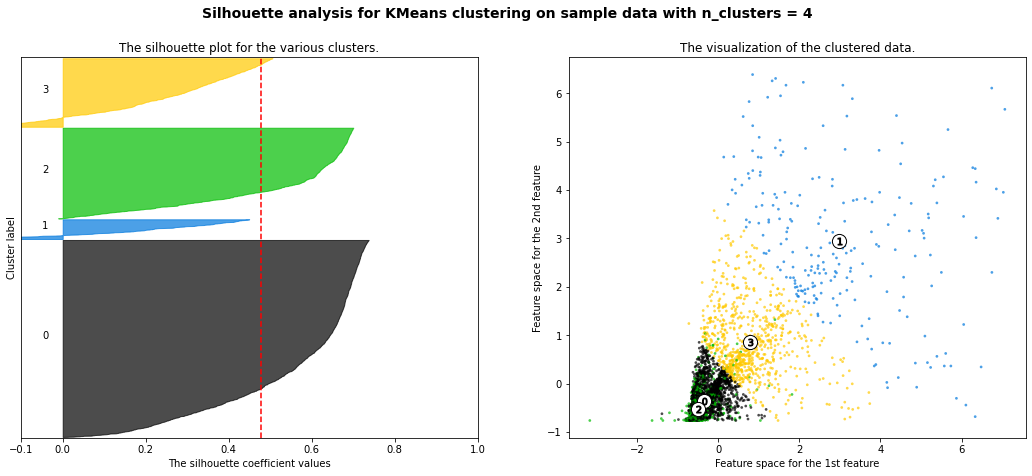

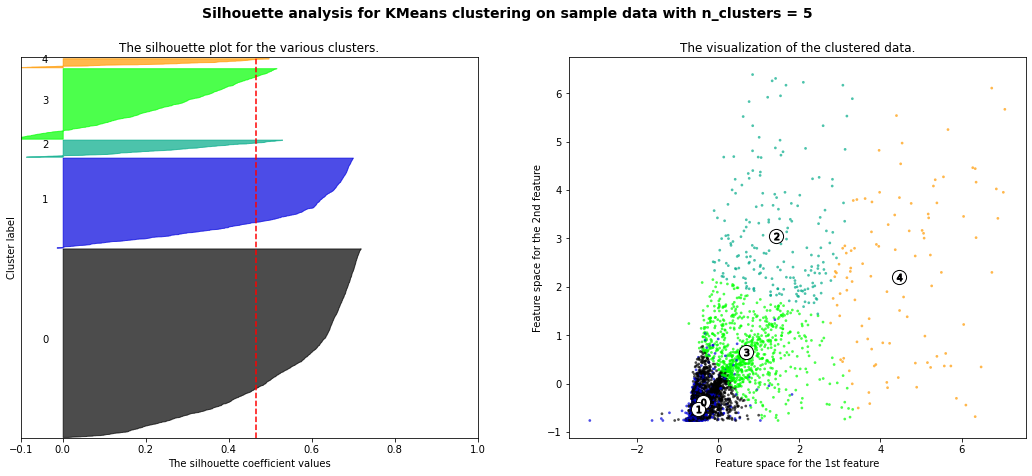

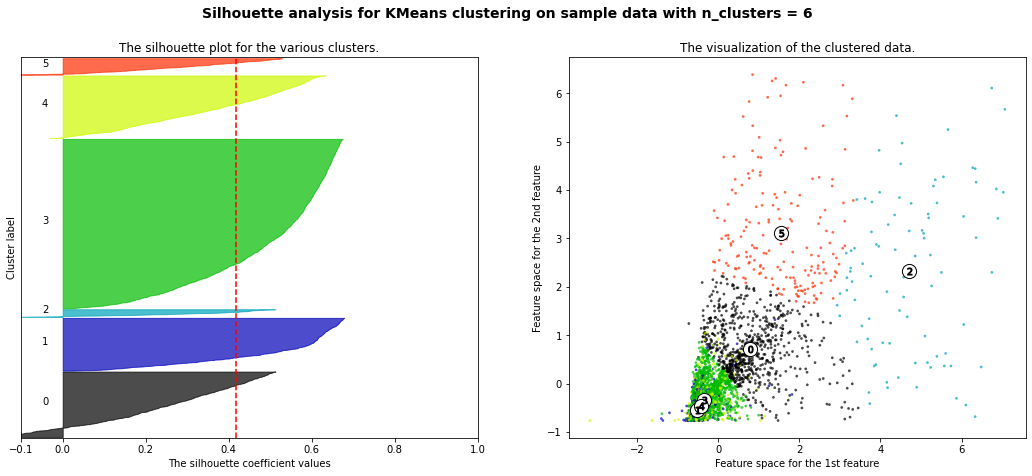

In [43]:
#find most suitable number of clusters using Silhouette analysis

X = rfm_scaled
X = X.to_numpy()
range_n_clusters = [2, 3, 4, 5, 6]
#X[:, 0]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=50)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<p>According to above two analysis, 3 clusters are most suitable for this data set. Because when the number clusters are 3, silhouette value is near to 1.</p>

In [44]:
#creating final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [47]:
#creating final dataframe with relevent clusters
rfm = td_rfm
rfm['ClusterID'] = kmeans.labels_
rfm.head()

CustomerID   Amount  Frequency  Recency  ClusterID
0    12346.0     0.00          2      325          0
1    12347.0  4310.00        182        1          1
2    12348.0  1797.24         31       74          2
3    12349.0  1757.55         73       18          2
4    12350.0   334.40         17      309          0

<AxesSubplot:title={'center':'ClusterID vs Amount'}, xlabel='ClusterID', ylabel='Amount'>

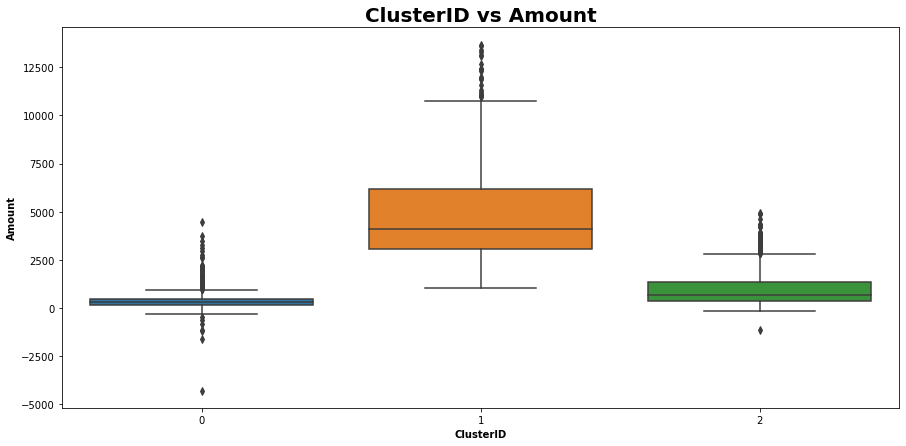

In [48]:
#Genarating boxplot to visualize ClusterID vs Amount
fig, ax = plt.subplots(figsize=(15, 7))

ax.set_title('ClusterID vs Amount',fontweight='bold',fontsize=20)
ax.set_xlabel('ClusterID',fontweight='bold')
ax.set_ylabel('Amount',fontweight='bold')


sns.boxplot(x='ClusterID', y='Amount', data=rfm)

<AxesSubplot:title={'center':'ClusterID vs Frequency'}, xlabel='ClusterID', ylabel='Frequency'>

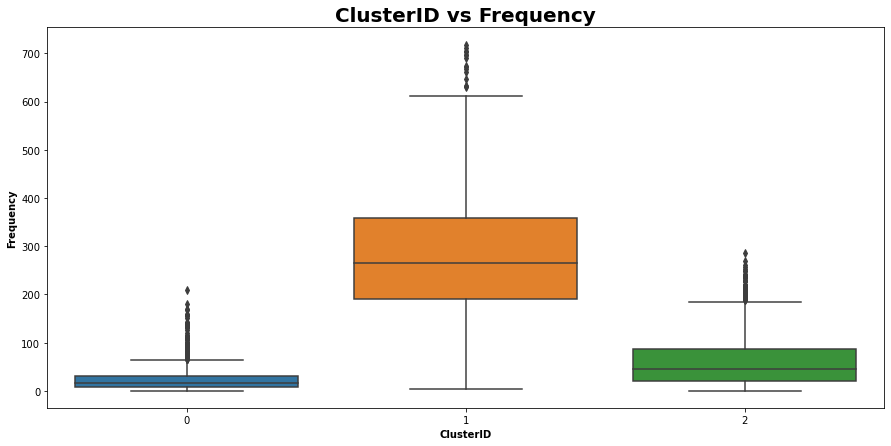

In [49]:
#Genarating boxplot to visualize ClusterID vs Frequency
fig, ax = plt.subplots(figsize=(15, 7))

ax.set_title('ClusterID vs Frequency',fontweight='bold',fontsize=20)
ax.set_xlabel('ClusterID',fontweight='bold')
ax.set_ylabel('Frequency',fontweight='bold')


sns.boxplot(x='ClusterID', y='Frequency', data=rfm)

<AxesSubplot:title={'center':'ClusterID vs Recency'}, xlabel='ClusterID', ylabel='Recency'>

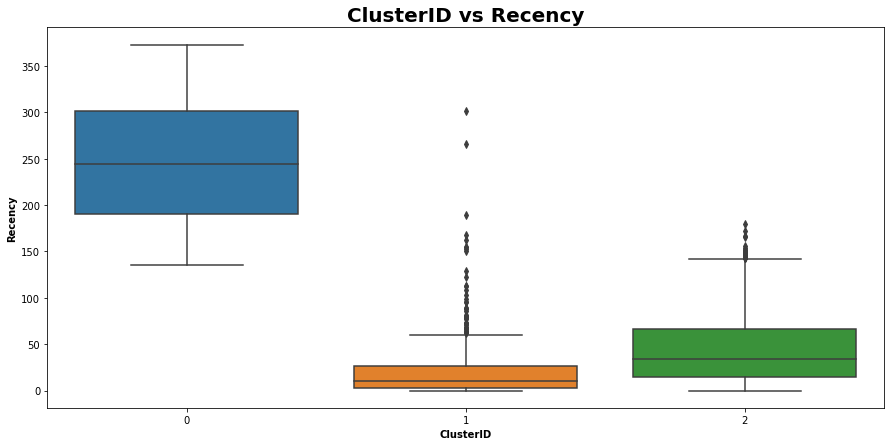

In [50]:
#Genarating boxplot to visualize ClusterID vs Recency
fig, ax = plt.subplots(figsize=(15, 7))

ax.set_title('ClusterID vs Recency',fontweight='bold',fontsize=20)
ax.set_xlabel('ClusterID',fontweight='bold')
ax.set_ylabel('Recency',fontweight='bold')


sns.boxplot(x='ClusterID', y='Recency', data=rfm)

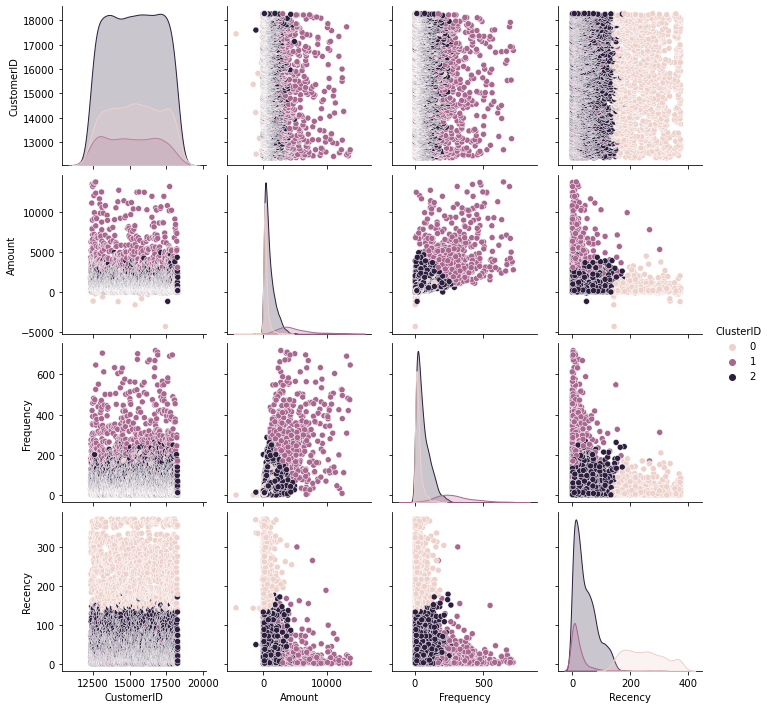

In [54]:
#creating scatterplot matrix for the rfm dataframe
rfm_scatter_matrix = rfm[['CustomerID', 'Amount', 'Frequency', 'Recency','ClusterID']]
rfm_scatter_matrix['CustomerID'] = rfm_scatter_matrix['CustomerID'].astype(float)

sns.pairplot(rfm_scatter_matrix, hue="ClusterID")

In [51]:
#saving clustered dataframe to csv file
rfm.to_csv('Data/Output.csv', index=False)

In [52]:
pd.read_csv('Data/Output.csv')

CustomerID   Amount  Frequency  Recency  ClusterID
0        12346.0     0.00          2      325          0
1        12347.0  4310.00        182        1          1
2        12348.0  1797.24         31       74          2
3        12349.0  1757.55         73       18          2
4        12350.0   334.40         17      309          0
...          ...      ...        ...      ...        ...
4288     18278.0   173.90          9       73          2
4289     18280.0   180.60         10      277          0
4290     18281.0    80.82          7      180          0
4291     18282.0   176.60         13        7          2
4292     18287.0  1837.28         70       42          2

[4293 rows x 5 columns]